# Introduction
***
Notebook **#2-ensemble_modelling_daun_singkong_all_testing** berisi uji coba dari semua eksperimen yang sudah dirancang, dimana pada notebook ini hanya tinggal meloading semua ensemble model yang sudah dilatih di setiap skenario uji coba dalam format pickle

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# sklearn for utilization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# visualization purpose
import matplotlib.pyplot as plt

# utils
import pickle

# Defining Global Variables 

In [2]:
kfold = StratifiedKFold(n_splits=5, random_state=45, shuffle=True)

# Defining Global Functions

In [3]:
def create_new_input_features(ensemble_classifiers, X, y):
    all_predicted_results = dict()
    list_of_majority_voting_each_models = list()

    for model_name, models in ensemble_classifiers.items():
        print("\t\t\t", model_name.upper())

        # voting scenario for new data input prepration for ANN model
        if len(models)!=0:
            all_predicted_results[model_name] = dict()
            for sub_model_name, dict_models in models.items():
                all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X)

            # make dataframe for 5 model prediction results on X and get the mode label for that 5 prediction
            model_df_voting = pd.DataFrame(all_predicted_results[model_name]).mode(axis=1)[0]
            model_df_voting.columns = ['majority_vote_from_'+model_name]
            list_of_majority_voting_each_models.append(model_df_voting)
            
    new_input_features = pd.concat(list_of_majority_voting_each_models, axis=1)
    new_input_features['ground_truth'] = y.copy()
            
    return new_input_features

In [4]:
# function untuk membuat fitur input baru untuk SKENARIO PENGUJIAN 3
def create_new_input_features_scenario_3(ensemble_classifiers, X, y):
    all_predicted_results = dict()
    list_of_majority_voting_each_models = list()

    for model_name, models in ensemble_classifiers.items():
        print("\t\t\t", model_name.upper())

        # voting scenario for new data input prepration for ANN model
        if len(models)!=0:
            all_predicted_results[model_name] = dict()
            all_sub_model_name = list()
            for sub_model_name, dict_models in models.items():
                all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X)
                all_sub_model_name.append(sub_model_name)

            # make dataframe for 5 model prediction results on X and get the mode label for that 5 prediction
            df_results_for_each_classifiers = pd.DataFrame(all_predicted_results[model_name])
            df_results_for_each_classifiers.columns = [model_name+"_"+sub_model_name for sub_model_name in all_sub_model_name]
            list_of_majority_voting_each_models.append(df_results_for_each_classifiers)
            
    new_input_features = pd.concat(list_of_majority_voting_each_models, axis=1)
    new_input_features['ground_truth'] = y.copy()
            
    return new_input_features

In [5]:
def print_model_experiment_results(name_of_scenario, y_test, y_pred):
    print('\t\t' + '='*30)
    print('\t\tHASIl UJI COBA {}'.format(name_of_scenario.upper()))
    print('\t\t' + '='*30)
    print("\tAkurasi Score: ", accuracy_score(y_test, y_pred))
    print("\tMacro Recall Score: ", recall_score(y_test, y_pred, average='macro'))
    print("\tMacro Precision Score: ", precision_score(y_test, y_pred, average='macro'))
    print("\tMacro F1-score Score: ", fbeta_score(y_test, y_pred, beta=1, average='macro'))
    print("\tMacro F2-score Score: ", fbeta_score(y_test, y_pred, beta=2, average='macro'))
    print("\tMacro F0.5-score Score: ", fbeta_score(y_test, y_pred, beta=0.5, average='macro'))
    
    print()
    print()
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(new_y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(14,8))
    disp.plot()
    plt.show()

# Load All pre-trained ensemble stacking model
***
Loading semua model ensemble stacking yang sudah dilatih dari notebook-notebook sebelumnya

In [6]:
# load pre-trained ensemble model from experiment 1
model_ensemble_experiment_1 = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_1.pkl', 'rb'))

# load pre-trained ensemble model from experiment 2
model_ensemble_experiment_2 = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_2.pkl', 'rb'))

# load pre-trained ensemble model from experiment 3
model_ensemble_experiment_3 = pickle.load(open('model_ensemble_experiment_results/model_ensemble_eksperimen_3.pkl', 'rb'))

# Testing Model using all pre-defined scenario
***
- Scenario 1: sesuai alur pada paper rujukan
- Scenario 2: feature selection dari fitur-fitur pada dataset daun singkong LBP

## Uji Coba Scenario 1

### Load Data for Scenario 1 from model_ensemble_experiment_1.pkl

In [7]:
X_train_scenario_1 = model_ensemble_experiment_1['data']['training']['X']
y_train_scenario_1 = model_ensemble_experiment_1['data']['training']['y']
X_test_scenario_1 = model_ensemble_experiment_1['data']['testing']['X']
y_test_scenario_1 = model_ensemble_experiment_1['data']['testing']['y']

### Create new input features from stacking ensemble ML before ANN process

In [8]:
new_input_testing_features = create_new_input_features(
    model_ensemble_experiment_1['stacking_ensembles'], 
    X_test_scenario_1,
    y_test_scenario_1
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 1
	Akurasi Score:  0.5668224299065421
	Macro Recall Score:  0.30305224892941596
	Macro Precision Score:  0.3258022294839763
	Macro F1-score Score:  0.30965011483436883
	Macro F2-score Score:  0.30481901157852287
	Macro F0.5-score Score:  0.3178285668559689


              precision    recall  f1-score   support

           0       0.15      0.13      0.14       326
           1       0.24      0.23      0.23       657
           2       0.21      0.15      0.18       716
           3       0.70      0.81      0.75      3948
           4       0.33      0.20      0.25       773

    accuracy                           0.57      6420
   macro avg       0.33      0.30      0.31      6420
weighted avg       0.53      0.57      0.54      6420



<Figure size 1008x576 with 0 Axes>

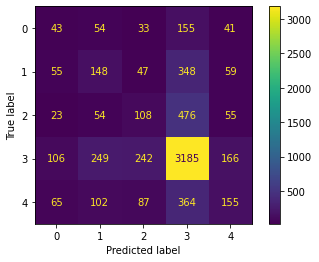

In [9]:
# split X and y from new_input_features before feeding to ANN
new_X_test, new_y_test = new_input_testing_features.drop(['ground_truth'],axis=1), new_input_testing_features['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_1 = model_ensemble_experiment_1['ann'].predict(new_X_test)

# print testing results
print_model_experiment_results('Skenario Uji Coba 1', new_y_test, predicted_ann_testing_scenario_1)

## Uji Coba Scenario 2

### Chi-Square 

#### Load Data for Scenario 2 (using Chi-Square) from model_ensemble_experiment_2.pkl

In [10]:
X_train_chi_square = model_ensemble_experiment_2['chi-square']['data']['training']['X']
y_train_chi_square = model_ensemble_experiment_2['chi-square']['data']['training']['y']
X_test_chi_square = model_ensemble_experiment_2['chi-square']['data']['testing']['X']
y_test_chi_square = model_ensemble_experiment_2['chi-square']['data']['testing']['y']

#### Create new input feature from stacking ensemble ML before ANN process

In [11]:
new_input_testing_features_chi_square = create_new_input_features(
    model_ensemble_experiment_2['chi-square']['stacking_ensembles'], 
    X_test_chi_square,
    y_test_chi_square
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


#### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 2 - USING CHI-SQUARE
	Akurasi Score:  0.5537383177570093
	Macro Recall Score:  0.28968754788643153
	Macro Precision Score:  0.3096408974793094
	Macro F1-score Score:  0.29551279799903746
	Macro F2-score Score:  0.29126372307033543
	Macro F0.5-score Score:  0.3026658303767739


              precision    recall  f1-score   support

           0       0.11      0.10      0.11       326
           1       0.22      0.19      0.20       657
           2       0.22      0.18      0.20       716
           3       0.70      0.79      0.74      3948
           4       0.30      0.18      0.23       773

    accuracy                           0.55      6420
   macro avg       0.31      0.29      0.30      6420
weighted avg       0.52      0.55      0.53      6420



<Figure size 1008x576 with 0 Axes>

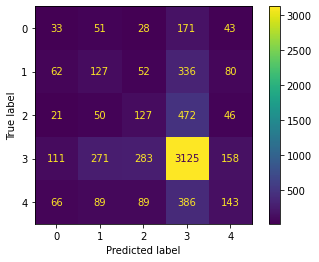

In [12]:
# split X and y from new_input_features before feeding to ANN
new_X_test_chi_square, new_y_test_chi_square = new_input_testing_features_chi_square.drop(['ground_truth'],axis=1), new_input_testing_features_chi_square['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_chi_square = model_ensemble_experiment_1['ann'].predict(new_X_test_chi_square)

# print testing results
print_model_experiment_results('Skenario Uji Coba 2 - Using Chi-Square', new_y_test_chi_square, predicted_ann_testing_scenario_chi_square)

### ANOVA F-score

#### Load Data for Scenario 2 (using ANOVA) from model_ensemble_experiment_2.pkl

In [13]:
X_train_anova = model_ensemble_experiment_2['anova']['data']['training']['X']
y_train_anova = model_ensemble_experiment_2['anova']['data']['training']['y']
X_test_anova = model_ensemble_experiment_2['anova']['data']['testing']['X']
y_test_anova = model_ensemble_experiment_2['anova']['data']['testing']['y']

#### Create new input feature from stacking ensemble ML before ANN process

In [14]:
new_input_testing_features_anova = create_new_input_features(
    model_ensemble_experiment_2['anova']['stacking_ensembles'], 
    X_test_anova,
    y_test_anova
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


#### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 2 - USING ANOVA F-SCORE
	Akurasi Score:  0.5490654205607477
	Macro Recall Score:  0.27258037403750873
	Macro Precision Score:  0.2887841891996083
	Macro F1-score Score:  0.2766625631718199
	Macro F2-score Score:  0.2734684274759668
	Macro F0.5-score Score:  0.2826739695876836


              precision    recall  f1-score   support

           0       0.09      0.08      0.08       326
           1       0.19      0.17      0.18       657
           2       0.19      0.15      0.17       716
           3       0.70      0.80      0.74      3948
           4       0.28      0.17      0.21       773

    accuracy                           0.55      6420
   macro avg       0.29      0.27      0.28      6420
weighted avg       0.51      0.55      0.52      6420



<Figure size 1008x576 with 0 Axes>

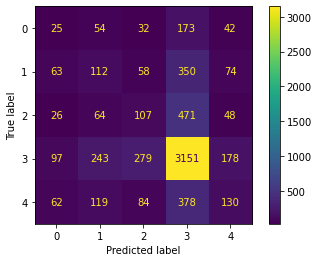

In [15]:
# split X and y from new_input_features before feeding to ANN
new_X_test_anova, new_y_test_anova = new_input_testing_features_anova.drop(['ground_truth'],axis=1), new_input_testing_features_anova['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_anova = model_ensemble_experiment_1['ann'].predict(new_X_test_anova)

# print testing results
print_model_experiment_results('Skenario Uji Coba 2 - Using ANOVA F-score', new_y_test_anova, predicted_ann_testing_scenario_anova)

## Uji Coba Scenario 3

### Load Data for Scenario 3 from model_ensemble_experiment_3.pkl

In [16]:
X_train_scenario_3 = model_ensemble_experiment_1['data']['training']['X']
y_train_scenario_3 = model_ensemble_experiment_1['data']['training']['y']
X_test_scenario_3 = model_ensemble_experiment_1['data']['testing']['X']
y_test_scenario_3 = model_ensemble_experiment_1['data']['testing']['y']

### Create new input features from stacking ensemble ML before ANN process

In [17]:
new_input_testing_features_scenario_3 = create_new_input_features_scenario_3(
    model_ensemble_experiment_3['stacking_ensembles'], 
    X_test_scenario_3,
    y_test_scenario_3
)

			 SVM
			 LOGREG
			 NAIVE_BAYES
			 DECISION_TREE


### Feed new input features into ANN

		HASIl UJI COBA SKENARIO UJI COBA 3
	Akurasi Score:  0.5633956386292834
	Macro Recall Score:  0.2606638053219061
	Macro Precision Score:  0.30589138880836086
	Macro F1-score Score:  0.2618851252989492
	Macro F2-score Score:  0.2591389601845987
	Macro F0.5-score Score:  0.2759476848015988


              precision    recall  f1-score   support

           0       0.12      0.02      0.03       326
           1       0.23      0.17      0.19       657
           2       0.15      0.16      0.16       716
           3       0.68      0.83      0.75      3948
           4       0.34      0.12      0.18       773

    accuracy                           0.56      6420
   macro avg       0.31      0.26      0.26      6420
weighted avg       0.50      0.56      0.52      6420



<Figure size 1008x576 with 0 Axes>

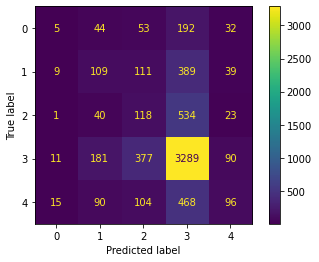

In [18]:
# split X and y from new_input_features before feeding to ANN
new_X_test_scenario_3, new_y_test_scenario_3 = new_input_testing_features_scenario_3.drop(['ground_truth'],axis=1), new_input_testing_features_scenario_3['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing_scenario_3 = model_ensemble_experiment_3['ann'].predict(new_X_test_scenario_3)

# print testing results
print_model_experiment_results('Skenario Uji Coba 3', new_y_test_scenario_3, predicted_ann_testing_scenario_3)